In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv("./data/SP500.csv", index_col=0, error_bad_lines=False)

In [3]:
df = df.dropna()

In [4]:
df['SP500'] = df[df['SP500']!='.'].astype(float)

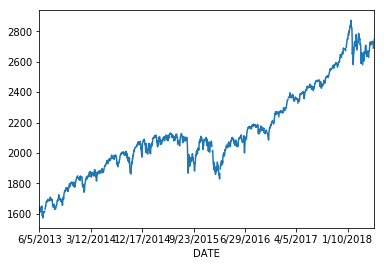

In [5]:
df['SP500'].plot()

In [6]:
change_rate = np.log(df['SP500']/df['SP500'].shift(-1))
df['tomorrow'] = np.where(change_rate>0, 1, 0)
df['tomorrow'] = df['tomorrow'].astype(int)

In [7]:
df = df.dropna()
df.head()

,SP500,tomorrow
DATE,,
6/5/2013,1608.90,0
6/6/2013,1622.56,0
6/7/2013,1643.38,1
6/10/2013,1642.81,1
6/11/2013,1626.13,1


In [8]:
df.describe()

,SP500,tomorrow
count,1259.000000,1259.000000
mean,2133.076616,0.443209
std,292.583969,0.496962
min,1573.090000,0.000000
25%,1939.185000,0.000000
50%,2081.720000,0.000000
75%,2349.130000,1.000000
max,2872.870000,1.000000


In [9]:
rows = []
window = 10
for ix in range(len(df)-window+1):
    row = df.iloc[ix:ix+window,0].values.T
    rows.append(row)

In [10]:
X_train = np.array(rows)

In [11]:
idxs = int(len(df)*0.7)

In [12]:
X_train = df.iloc[1:idxs+1,0].values.reshape(-1,1) # First one missing
y_train = df.iloc[0:idxs,-1].values

In [13]:
X_test = df.iloc[idxs+1:-1,0].values.reshape(-1,1) # Exclude last measurement
y_test = df.iloc[idxs+1:-1,-1].values

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

In [15]:
models = [
    RandomForestClassifier(),
    LogisticRegression(), 
    GaussianProcessClassifier(),
    MLPClassifier()
]

best_score = 0
best_model = None

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    
    if score > best_score:
        best_score = score
        best_model = model

In [16]:
print("Best score found: ", best_score)

Best score found:  0.5930851063829787


In [17]:
print("Best model: ", best_model)

Best model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [18]:
y_preds = best_model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
confusion_matrix(y_pred=y_preds, y_true=y_test)

array([[223,   0],
       [153,   0]], dtype=int64)

In [21]:
print(classification_report(y_pred=y_preds, y_true=y_test))

             precision    recall  f1-score   support

          0       0.59      1.00      0.74       223
          1       0.00      0.00      0.00       153

avg / total       0.35      0.59      0.44       376



c:\users\hp\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
pct = np.sum(y_preds!=y_test)/len(y_test)*100
print("Percentage of correctly guessed outcomes: ", pct)

Percentage of correctly guessed outcomes:  40.691489361702125
